# PCA.
A análise de componentes principais pode ser dividida em cinco etapas, vai ser passado cada etapa, fornecendo explicações lógicas 
sobre o PCA está fazendo e simpleficando o conceito matemáticos, como padronização, covariância, vetores própios e valores própios.
* Padronizar a gama de variáveis iniciais contínuas.
* Calcular a matriz de covariância para identificar correlações.
* Calcular os autovetores e autovalores da matriz de covariância para indentificar os componentes principais.
* Ciar um vetor de recursos para decidir quais componentes principais manter.
* Reformar os dados ao longo dos eixos dos componentes principais.

## Padronização.
Matemáticamente, isso pode ser feito subtraindo a média e dividindo pelo desvio padrão para cada valor de cada variável.
$$z = \frac{value-mean}{standarddeviation}$$
Desta forma todas as variáveis serão transformadas na mesma escala.

## Cálculo da matriz de covariâcia.
O objetivo desta etapa é entender como as variáveis ​​do conjunto de dados de entrada estão variando da média entre si, ou seja, verificar se existe alguma relação entre elas, porque às vezes as variáveis ​​são altamente correlacionadas de forma que contêm informações redundantes.

![img](https://cdn.builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png)

Como a covariância de uma variável  consigo mesma é sua variância, e como a covariância é comutativa então temos a matriz triangular superior e a inferior serão iguais desse modo podemos notar mais possiveis erros.

O que as covariâncias que temos como entradas da matriz nos dizem sobre as correlações entre as variáveis?
Na verdade, é o sinal da covariância que importa.
* Se possitivo, então: as duas variáveis aumentam ou diminuem juntas(correlacionadas).
* Se negativo, então: um aumenta quando o outro diminui(inversamente correlacionado).


## Calcular os vetores própios e os valores próprios da matriz de covariância para indentificar os componentes principais.
Autovetores e autovalores são os conceitos de álgebra linear que precisamos calcular a partir da matriz de covariância para determinar os componentes principais dos dados. Antes de chegar à explicar desses conceitos.
$\newline$ Os componentes principais são novas variáveis contruidas como combinação lineares ou misturadas das variáveis iniciais. Essas combinações são feitas de forma que as novas variáveis não estejam correlacionadas e a maioria das informalçoes dentro das variáveis iniciais seja comprimida nos primeiros componentes, ou seja, a ideia que dados 10 dimensionas forneçam 10 componentes principais, mas o PCA tenta colocar o máximo de informações possiveis no primeiro componente, e depois o máximo de informações restantes no segundo e assim por diante.

## Vetor de recurso.
Como vimos na etapa anterior, computar os autovetores e ordená-los por seus autovalores em ordem decrescente nos permite encontrar os componentes principais em ordem de significância. Nesta etapa, o que fazemos é escolher entre manter todos esses componentes ou descartar aqueles de menor significância (de autovalores baixos), e formar com os restantes uma matriz de vetores que chamamos de  vetor de característica .

Portanto, o vetor de características é simplesmente uma matriz que tem como colunas os autovetores dos componentes que decidimos manter. Isso o torna o primeiro passo para a redução da dimensionalidade, porque se escolhermos manter apenas  p  autovetores (componentes) de  n , o conjunto de dados final terá apenas  p  dimensões.

## Reformule os dados ao longo dos eixos dos componentes principais.
Nesta etapa, que é a última, o objetivo é usar o vetor de características formado a partir dos autovetores da matriz de covariância, para reorientar os dados dos eixos originais para aqueles representados pelos componentes principais (daí o nome Análise de Componentes Principais ) Isso pode ser feito multiplicando a transposição do conjunto de dados original pela transposição do vetor de características.
$$finalDataSet = FeatureVector^T \cdot StandardizedOriginalDataSet$$

In [10]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as fig
from datetime import datetime as dt
import seaborn as sns



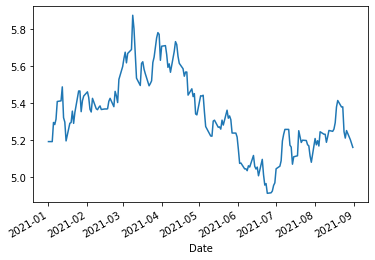

In [11]:
dt_inicio = '2021-01-01'
hoje = f'{dt.today().year}-{dt.today().month}-{dt.today().day}'
dt_final = hoje

usd = web.DataReader('USDBRL=X', data_source='yahoo', start=dt_inicio, end=dt_final)
usd['Close'].plot()
fig.show()

In [12]:
usd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5.199149,5.191600,5.1921,5.1921,0,5.1921
2021-01-04,5.252800,5.116400,5.1728,5.1919,0,5.1919
2021-01-05,5.350300,5.274600,5.2950,5.2953,0,5.2953
2021-01-06,5.346680,5.231207,5.2845,5.2841,0,5.2841
2021-01-07,5.405568,5.296700,5.3133,5.3129,0,5.3129
...,...,...,...,...,...,...
2021-08-24,5.266700,5.226300,5.2459,5.2458,0,5.2458
2021-08-25,5.256100,5.207356,5.2110,5.2110,0,5.2110
2021-08-26,5.258500,5.189700,5.2518,5.2516,0,5.2516


In [13]:
data = numpy.asanyarray(usd)
data

array([[5.19914913, 5.19159985, 5.19210005, 5.19210005, 0.        ,
        5.19210005],
       [5.25279999, 5.11639977, 5.17280006, 5.19189978, 0.        ,
        5.19189978],
       [5.35029984, 5.27460003, 5.29500008, 5.29530001, 0.        ,
        5.29530001],
       ...,
       [5.2585001 , 5.18970013, 5.25180006, 5.25159979, 0.        ,
        5.25159979],
       [5.22230005, 5.18200016, 5.20300007, 5.2027998 , 0.        ,
        5.2027998 ],
       [5.19649982, 5.15789986, 5.18520021, 5.16069984, 0.        ,
        5.16069984]])

In [15]:
np.cov(np.transpose(data))

array([[0.04412771, 0.0423986 , 0.04356564, 0.04352372, 0.        ,
        0.04352372],
       [0.0423986 , 0.04155808, 0.04234373, 0.04227116, 0.        ,
        0.04227116],
       [0.04356564, 0.04234373, 0.04405516, 0.04398832, 0.        ,
        0.04398832],
       [0.04352372, 0.04227116, 0.04398832, 0.04395016, 0.        ,
        0.04395016],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.04352372, 0.04227116, 0.04398832, 0.04395016, 0.        ,
        0.04395016]])

In [19]:
cov_data = np.cov(np.transpose(data))
import numpy.linalg as la
w,v = la.eig(cov_data) ## obetem autovalores e autovetores.
w


array([ 2.16292375e-01,  9.09111081e-04,  4.21697579e-04,  1.80814161e-05,
       -6.93734046e-18,  0.00000000e+00])

* A função numpy.linalg.eig retorna dois valores: um vetor de autovalores w (não necessariamente ordenados )
* na análise PCA, os maiores  autovalores correspodem aos componentes principais componetes principais mais importantes ou, em outras palavras, os palavras, os dados sofrem maior variação.
Por isso o primeiro passo é a ordenação dos autovalores e seus autovetores correspondentes em ordem decrescente.

In [22]:
ind = np.argsort(w)[::-1] ## obtem indices para a ordenação decrescente dos autovetores
w_dec = w[ind]
w_dec

array([ 2.16292375e-01,  9.09111081e-04,  4.21697579e-04,  1.80814161e-05,
        0.00000000e+00, -6.93734046e-18])

In [23]:
la.norm(w[0])

0.21629237535017778

* Representando autovalores da matriz covariâncias


In [24]:
EVR = w/sum(w)
EVR

array([ 9.93802232e-01,  4.17710805e-03,  1.93758099e-03,  8.30789881e-05,
       -3.18751154e-17,  0.00000000e+00])

In [27]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data)
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[ 4.48993378e-01,  4.35950287e-01,  4.50669758e-01,
         4.50138347e-01,  0.00000000e+00,  4.50138347e-01],
       [ 6.20759938e-01,  4.75626710e-01, -3.53037562e-01,
        -3.63180955e-01,  0.00000000e+00, -3.63180955e-01],
       [ 6.42187367e-01, -7.62922287e-01, -6.56888663e-03,
         5.24491117e-02, -0.00000000e+00,  5.24491117e-02],
       [-2.56404128e-02,  4.09409845e-02, -8.19889077e-01,
         4.03390819e-01, -0.00000000e+00,  4.03390819e-01],
       [-0.00000000e+00, -2.00891433e-17, -7.52342092e-17,
        -7.07106781e-01,  0.00000000e+00,  7.07106781e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00,  0.00000000e+00]])